In [49]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [50]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.set_figure_params(dpi=80, facecolor="white")
#sc.logging.print_header()


In [51]:
directory = 'C:\\Users\\fuedg\\Desktop\\scanpy\\pbmc3k_raw_gene_bc_matrices\\raw_gene_bc_matrices\\hg19'

adata = sc.read_10x_mtx(directory, var_names='gene_symbols', cache=True)

... reading from cache file cache\C-Users-fuedg-Desktop-scanpy-pbmc3k_raw_gene_bc_matrices-raw_gene_bc_matrices-hg19-matrix.h5ad


# ADATA

In [52]:
adata.var_names

Index(['MIR1302-10', 'FAM138A', 'OR4F5', 'RP11-34P13.7', 'RP11-34P13.8',
       'AL627309.1', 'RP11-34P13.14', 'RP11-34P13.9', 'AP006222.2',
       'RP4-669L17.10',
       ...
       'KIR3DL2-1', 'AL590523.1', 'CT476828.1', 'PNRC2-1', 'SRSF10-1',
       'AC145205.1', 'BAGE5', 'CU459201.1', 'AC002321.2', 'AC002321.1'],
      dtype='object', length=32738)

In [53]:
teste = adata.var_names_make_unique()

In [54]:
adata.obs_names

Index(['AAACATACAAAACG-1', 'AAACATACAAAAGC-1', 'AAACATACAAACAG-1',
       'AAACATACAAACGA-1', 'AAACATACAAAGCA-1', 'AAACATACAAAGTG-1',
       'AAACATACAACAGA-1', 'AAACATACAACCAC-1', 'AAACATACAACCGT-1',
       'AAACATACAACCTG-1',
       ...
       'TTTGCATGTTGGTG-1', 'TTTGCATGTTGTCT-1', 'TTTGCATGTTGTGG-1',
       'TTTGCATGTTTACC-1', 'TTTGCATGTTTCAC-1', 'TTTGCATGTTTCGT-1',
       'TTTGCATGTTTCTG-1', 'TTTGCATGTTTGCT-1', 'TTTGCATGTTTGGG-1',
       'TTTGCATGTTTGTC-1'],
      dtype='object', length=737280)

In [55]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 734529 cells that have less than 200 genes expressed
filtered out 19012 genes that are detected in less than 3 cells


In [56]:
adata.var_names

Index(['AL627309.1', 'AP006222.2', 'RP11-206L10.2', 'RP11-206L10.9',
       'LINC00115', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4',
       ...
       'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'AC145212.1',
       'AL592183.1', 'AL354822.1', 'PNRC2-1', 'SRSF10-1'],
      dtype='object', length=13726)

In [57]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [58]:
a = 0
i = 0
for x in adata.var['mt']:
    if(x == True):
        a= a+1
    else:
        i+=1

print(f"Verdadeiro: {a}")
print(f"Falso: {i}")
        

Verdadeiro: 13
Falso: 13713


In [59]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [60]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


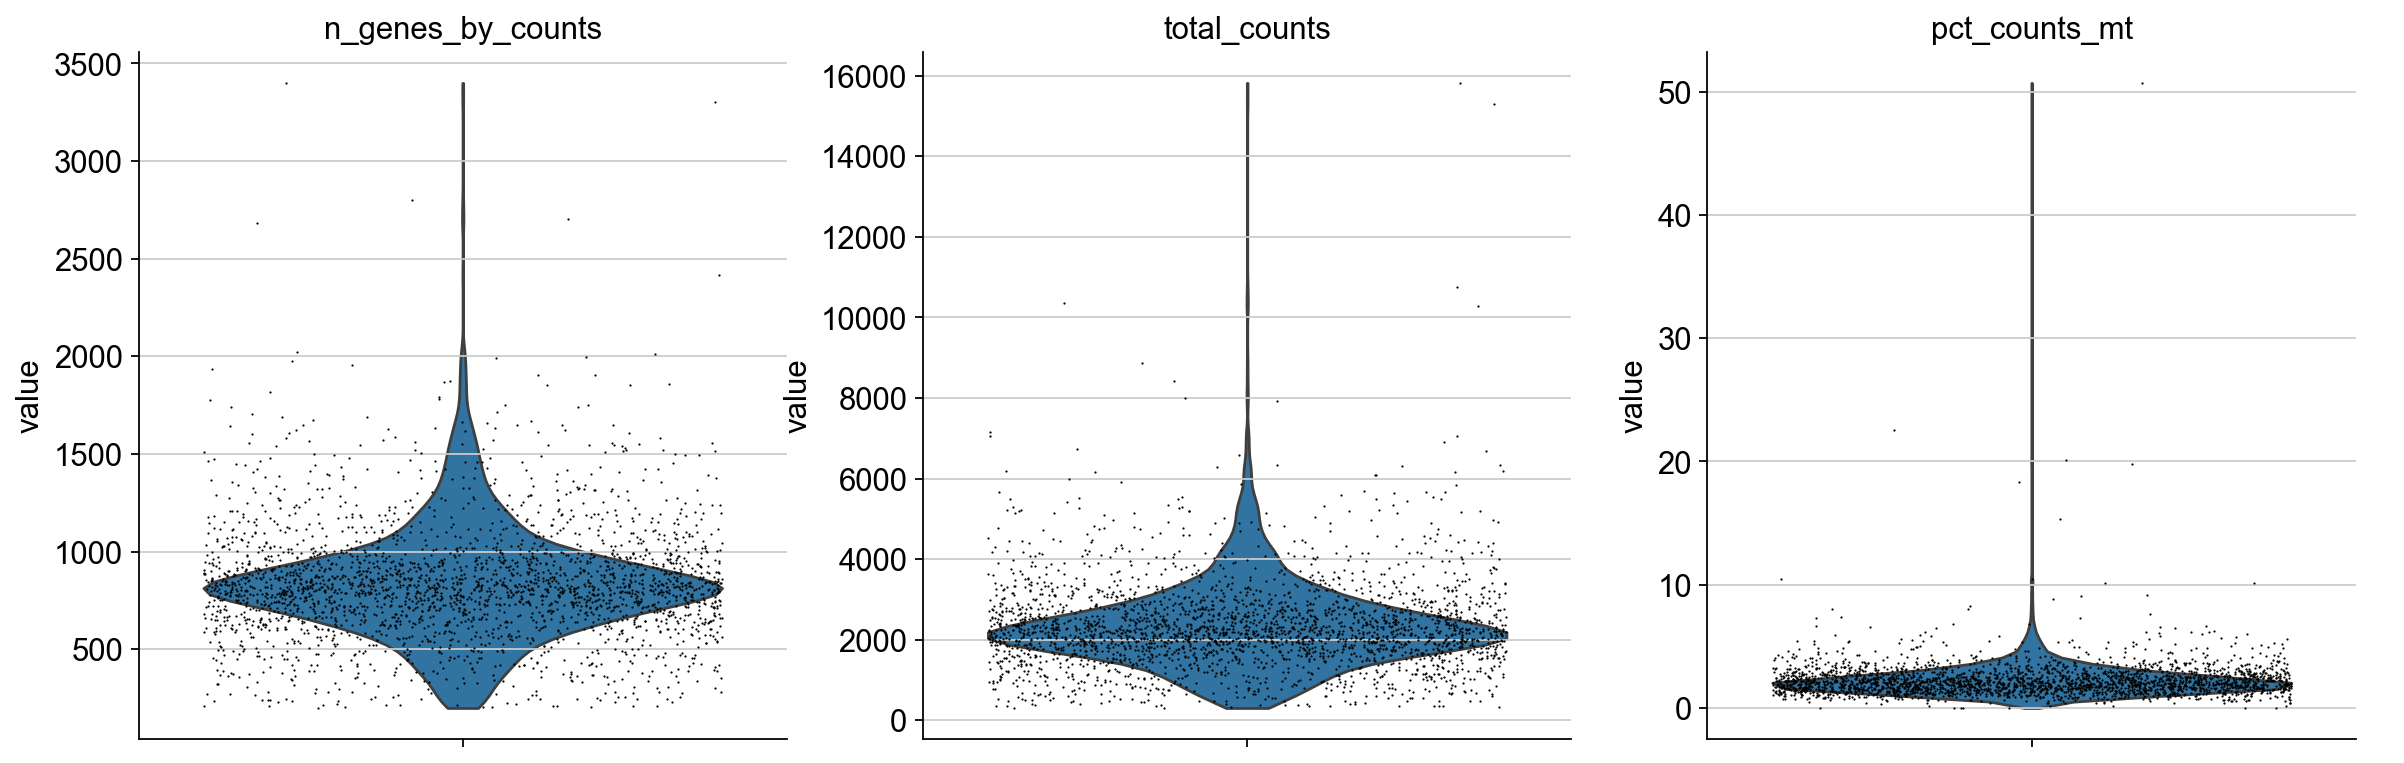

In [61]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

# Teste para dividir

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

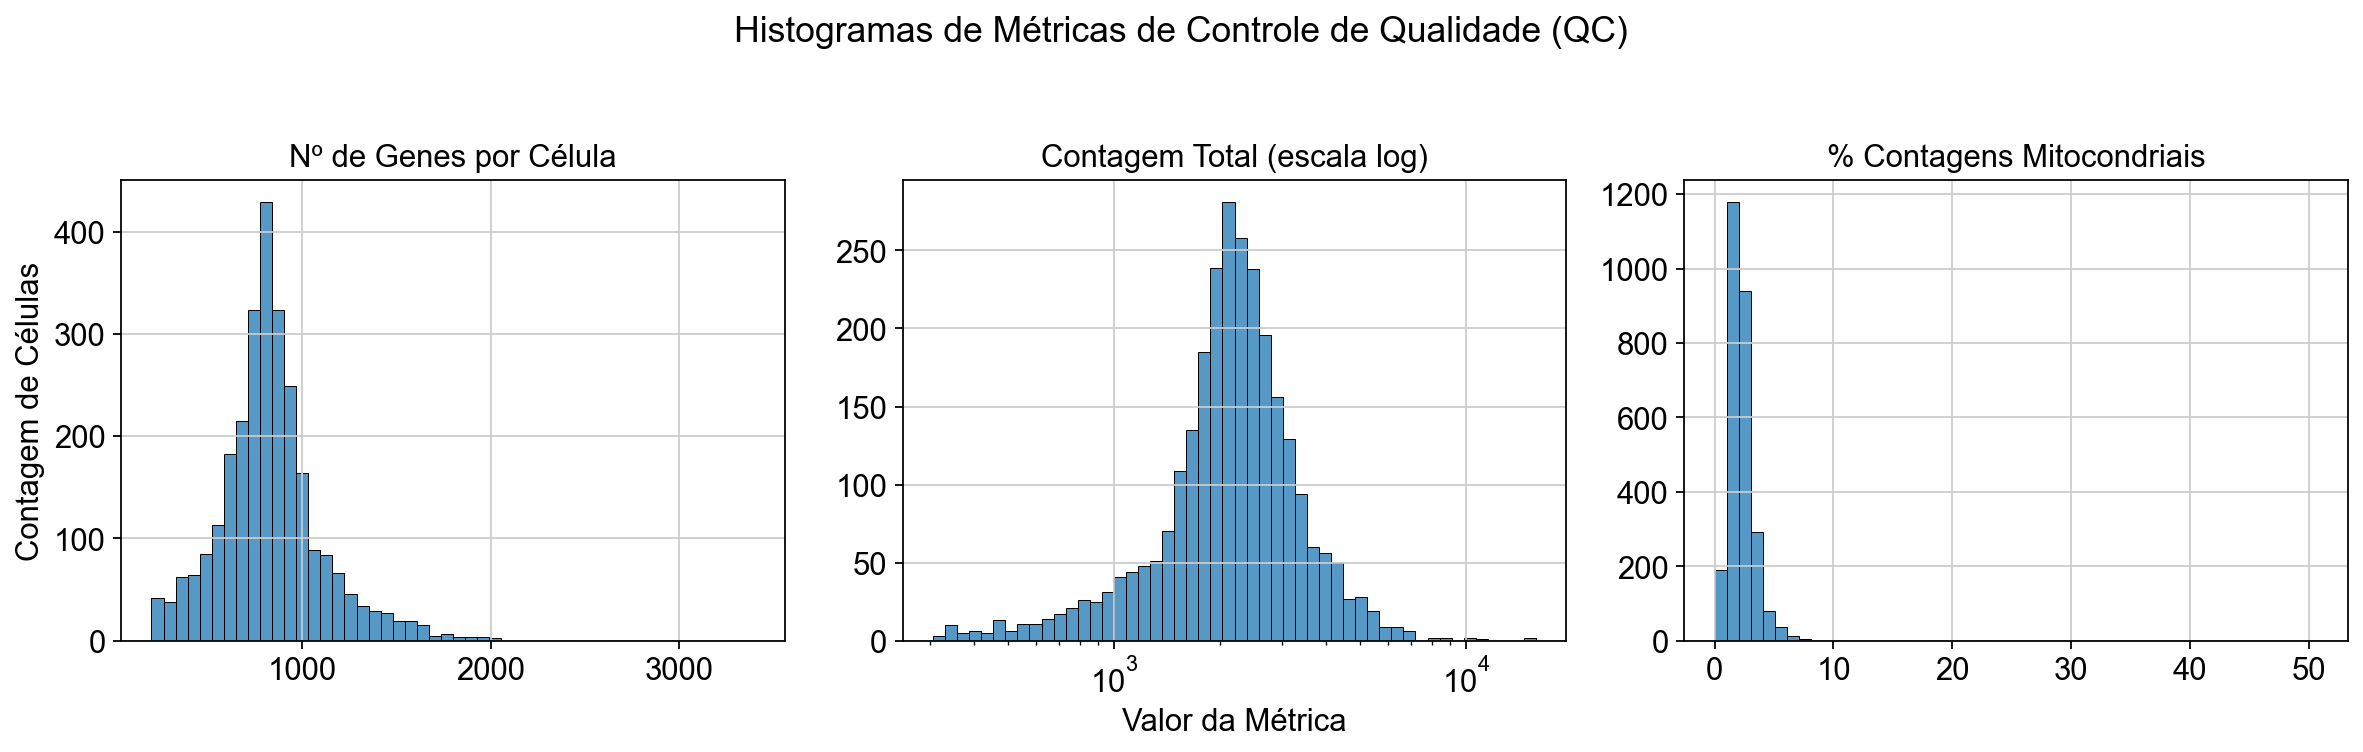

In [23]:
# Crie uma figura com 3 subplots, um ao lado do outro
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Histogramas de Métricas de Controle de Qualidade (QC)', fontsize=16)


# --- Gráfico 1: Histograma para 'n_genes_by_counts' ---
sns.histplot(data=adata.obs, x='n_genes_by_counts', ax=axes[0], bins=50)
axes[0].set_title('Nº de Genes por Célula')
axes[0].set_xlabel('') # Opcional: remover rótulos repetidos
axes[0].set_ylabel('Contagem de Células')


# --- Gráfico 2: Histograma para 'total_counts' com escala de log ---
sns.histplot(data=adata.obs, x='total_counts', ax=axes[1], bins=50, log_scale=True)
axes[1].set_title('Contagem Total (escala log)')
axes[1].set_xlabel('Valor da Métrica')
axes[1].set_ylabel('')


# --- Gráfico 3: Histograma para 'pct_counts_mt' ---
sns.histplot(data=adata.obs, x='pct_counts_mt', ax=axes[2], bins=50)
axes[2].set_title('% Contagens Mitocondriais')
axes[2].set_xlabel('')
axes[2].set_ylabel('')


# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para o supertítulo

plt.show()

In [28]:
# Defina o seu limiar
limiar_contagens = 1000

# 1. Crie a nova coluna, rotulando todas as células como 'alta_qualidade'
adata.obs['qualidade_counts'] = 'alta_qualidade'

# 2. Encontre as células abaixo do limiar e mude o rótulo delas para 'baixa_qualidade'
adata.obs.loc[adata.obs['total_counts'] < limiar_contagens, 'qualidade_counts'] = 'baixa_qualidade'

# Verifique se a coluna foi criada corretamente
print("Contagem de células em cada categoria:")
print(adata.obs['qualidade_counts'].value_counts())

Contagem de células em cada categoria:
qualidade_counts
alta_qualidade     2547
baixa_qualidade     204
Name: count, dtype: int64


In [38]:
adata.obs['total_counts']


AAACATACAACCAC-1    2419.0
AAACATTGAGCTAC-1    4903.0
AAACATTGATCAGC-1    3147.0
AAACCGTGCTTCCG-1    2639.0
AAACCGTGTATGCG-1     980.0
                     ...  
TTTCGAACTCTCAT-1    3459.0
TTTCTACTGAGGCA-1    3443.0
TTTCTACTTCCTCG-1    1684.0
TTTGCATGAGAGGC-1    1022.0
TTTGCATGCCTCAC-1    1984.0
Name: total_counts, Length: 2751, dtype: float32

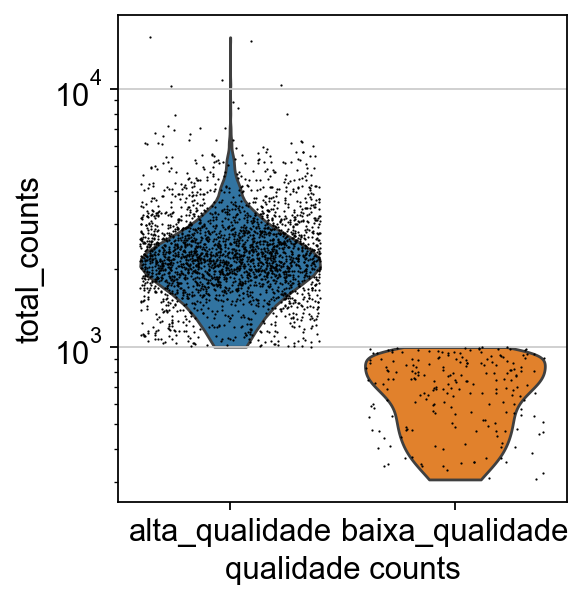

In [39]:

# # Este código agora vai funcionar, pois a coluna 'qualidade_counts' existe!
# sc.pl.violin(
#     adata,
#     ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
#     groupby='qualidade_counts',
#     multi_panel=True,
#     jitter=0.4
# )


# Plota o gráfico de violino apenas para 'total_counts'
# O parâmetro log=True melhora a visualização de dados de contagem
sc.pl.violin(
    adata,
    ['total_counts'],
    groupby='qualidade_counts',
    jitter=0.4,
    log=True
)

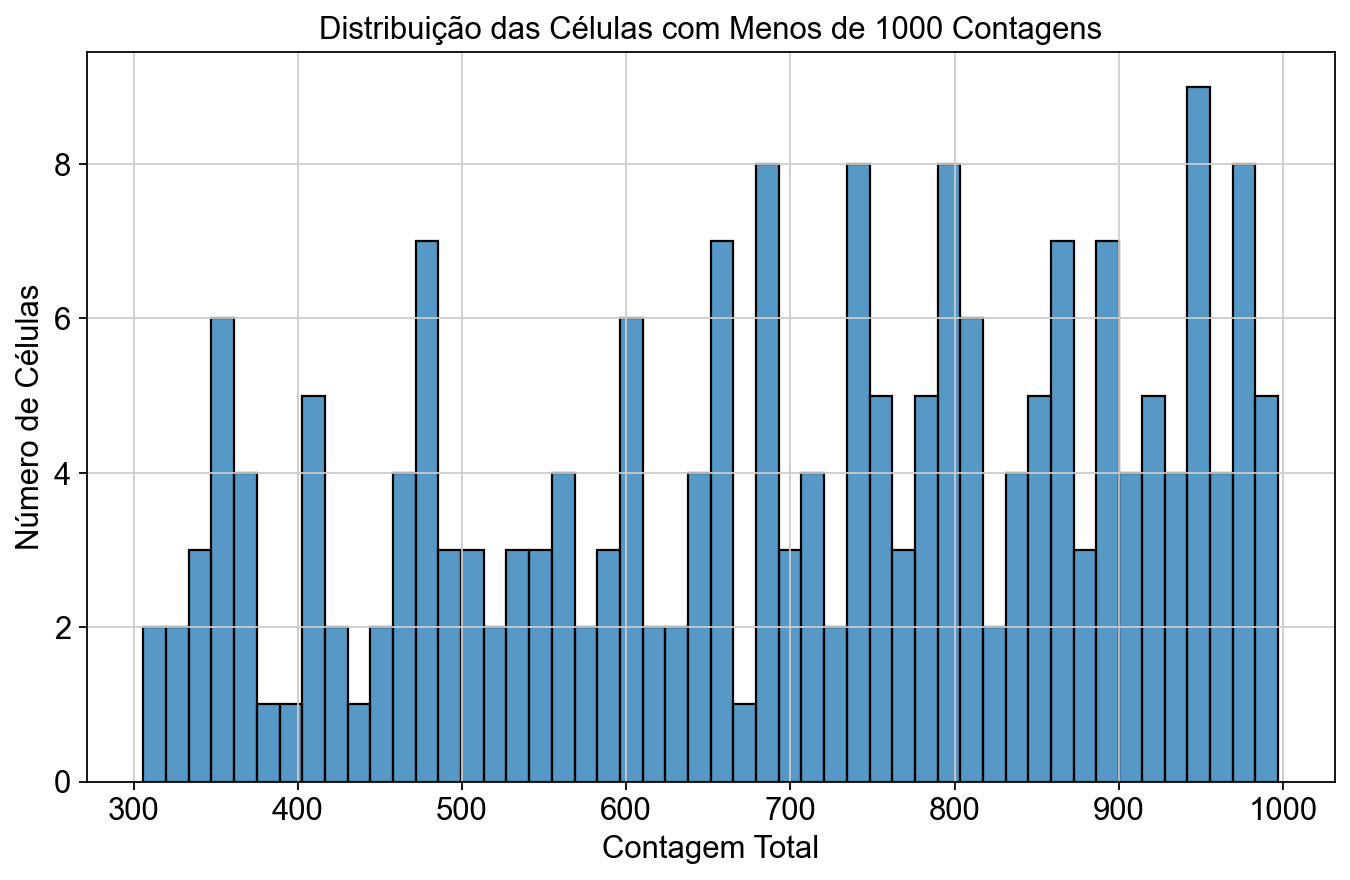

In [41]:

# Define o tamanho da figura
plt.figure(figsize=(10, 6))

# Filtramos o DataFrame diretamente na chamada da função de plotagem.
# Selecionamos apenas as linhas onde a coluna 'qualidade_counts' é igual a 'baixa_qualidade'.
sns.histplot(
    data=adata.obs[adata.obs['qualidade_counts'] == 'baixa_qualidade'],
    x='total_counts',
    bins=50
    # Note que não usamos escala de log aqui, para podermos ver em detalhe
    # a distribuição linear dos valores entre 0 e 1000.
)

plt.title('Distribuição das Células com Menos de 1000 Contagens', fontsize=14)
plt.xlabel('Contagem Total')
plt.ylabel('Número de Células')
plt.show()

In [42]:
# Compara a média de 'pct_counts_mt' entre os dois grupos
media_mt = adata.obs.groupby('qualidade_counts')['pct_counts_mt'].mean()

print("Média do percentual mitocondrial por grupo:")
print(media_mt)

Média do percentual mitocondrial por grupo:
qualidade_counts
alta_qualidade     2.153301
baixa_qualidade    3.635087
Name: pct_counts_mt, dtype: float32


C:\Users\fuedg\AppData\Local\Temp\ipykernel_2764\3700888537.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_mt = adata.obs.groupby('qualidade_counts')['pct_counts_mt'].mean()


In [43]:
# Compara a média de 'n_genes_by_counts' entre os dois grupos
media_genes = adata.obs.groupby('qualidade_counts')['n_genes_by_counts'].mean()

print("\nMédia do número de genes por grupo:")
print(media_genes)


Média do número de genes por grupo:
qualidade_counts
alta_qualidade     873.390656
baixa_qualidade    346.745098
Name: n_genes_by_counts, dtype: float64


C:\Users\fuedg\AppData\Local\Temp\ipykernel_2764\2267668874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_genes = adata.obs.groupby('qualidade_counts')['n_genes_by_counts'].mean()



Genes mais expressos no grupo de baixa qualidade:
normalizing counts per cell
    finished (0:00:02)


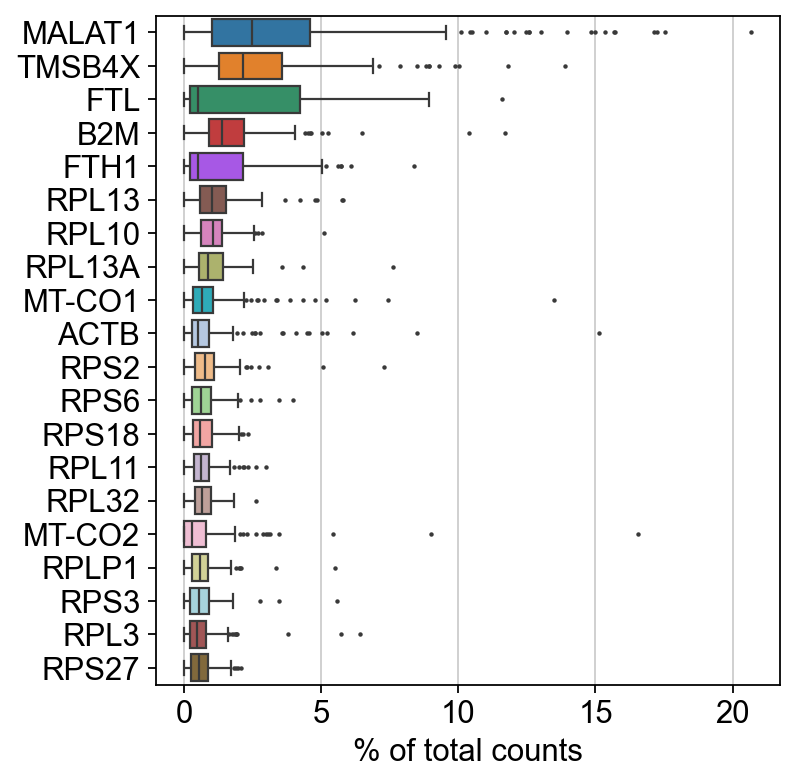

In [44]:

# 1. Crie o objeto AnnData apenas com as células de baixa qualidade
adata_baixa_qualidade = adata[adata.obs['qualidade_counts'] == 'baixa_qualidade', :].copy()

# 2. Plote os genes mais expressos nesse grupo
print("\nGenes mais expressos no grupo de baixa qualidade:")
sc.pl.highest_expr_genes(adata_baixa_qualidade, n_top=20)

In [1]:
adata  = adata[adata.obs.n_genes_by_counts <6500, :]
adata  = adata[adata.obs.total_counts > 6000, :]
adata  = adata[adata.obs.pct_counts_mt < 5, :]

NameError: name 'adata' is not defined

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4,
             multi_panel
            )

In [16]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sugerir_faixa_de_filtragem_de_genes(adata, percentil_min=5, percentil_max=95):
    """
    Analisa a expressão gênica em um objeto AnnData e sugere uma faixa para filtrar
    genes com base no número de células em que são expressos.

    Esta função ajuda a identificar e remover genes que são detectados em pouquíssimas
    células, o que pode representar ruído técnico ou atividade biológica irrelevante
    para a análise de um grande número de células.

    Args:
        adata (anndata.AnnData): O objeto AnnData contendo os dados de contagem.
        percentil_min (int): O percentil para o limite inferior do número de células.
                             Define o corte para genes expressos em poucas células.
        percentil_max (int): O percentil para o limite superior do número de células.
                             Útil para identificar genes expressos em quase todas as células,
                             que podem ser genes de manutenção ('housekeeping') e, dependendo
                             da análise, podem ser de menor interesse para identificar
                             diferenças entre grupos de células.

    Returns:
        tuple: Uma tupla contendo o número mínimo e máximo de células sugerido para
               a filtragem dos genes.
    """
    # 1. Calcula as métricas de QC para os genes, se ainda não tiverem sido calculadas.
    #    A métrica 'n_cells_by_counts' nos diz em quantas células cada gene foi detectado.
    if 'n_cells_by_counts' not in adata.var.columns:
        sc.pp.calculate_qc_metrics(adata, inplace=True)

    n_cells_por_gene = adata.var['n_cells_by_counts']

    # 2. Calcula os valores dos percentis para sugerir a faixa de filtragem.
    min_celulas = np.percentile(n_cells_por_gene, percentil_min)
    max_celulas = np.percentile(n_cells_por_gene, percentil_max)

    # 3. Gera um gráfico para visualizar a distribuição e os cortes sugeridos.
    plt.figure(figsize=(12, 6))
    sns.histplot(n_cells_por_gene, bins=100, kde=True)

    # Adiciona linhas verticais para indicar os cortes sugeridos.
    plt.axvline(min_celulas, color='red', linestyle='--', label=f'Percentil {percentil_min}% ({min_celulas:.2f} células)')
    plt.axvline(max_celulas, color='green', linestyle='--', label=f'Percentil {percentil_max}% ({max_celulas:.2f} células)')

    plt.title('Distribuição do Número de Células por Gene', fontsize=16)
    plt.xlabel('Número de Células em que o Gene é Expresso')
    plt.ylabel('Frequência de Genes')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

    # 4. Imprime as sugestões de forma clara.
    print("--- Sugestão para Filtragem de Genes ---")
    print(f"\nCom base na distribuição, sugerimos manter os genes que são expressos em pelo menos {min_celulas:.2f} células.")
    print("Isso corresponde ao percentil " f"{percentil_min}"" da distribuição, ajudando a remover genes com expressão muito esparsa (possivelmente ruído).")
    print(f"\nPara aplicar este filtro, você pode usar a seguinte função do Scanpy:")
    print(f"sc.pp.filter_genes(adata, min_cells={int(np.ceil(min_celulas))})")

    return (min_celulas, max_celulas)

# --- Exemplo de como usar a função ---
# (Assumindo que você já tenha um objeto 'adata' carregado)

# Se você não tiver um objeto adata, pode criar um de exemplo:
# import scanpy as sc
# adata = sc.datasets.pbmc3k()

# Chame a função com o seu objeto AnnData
# min_celulas_sugerido, max_celulas_sugerido = sugerir_faixa_de_filtragem_de_genes(adata)

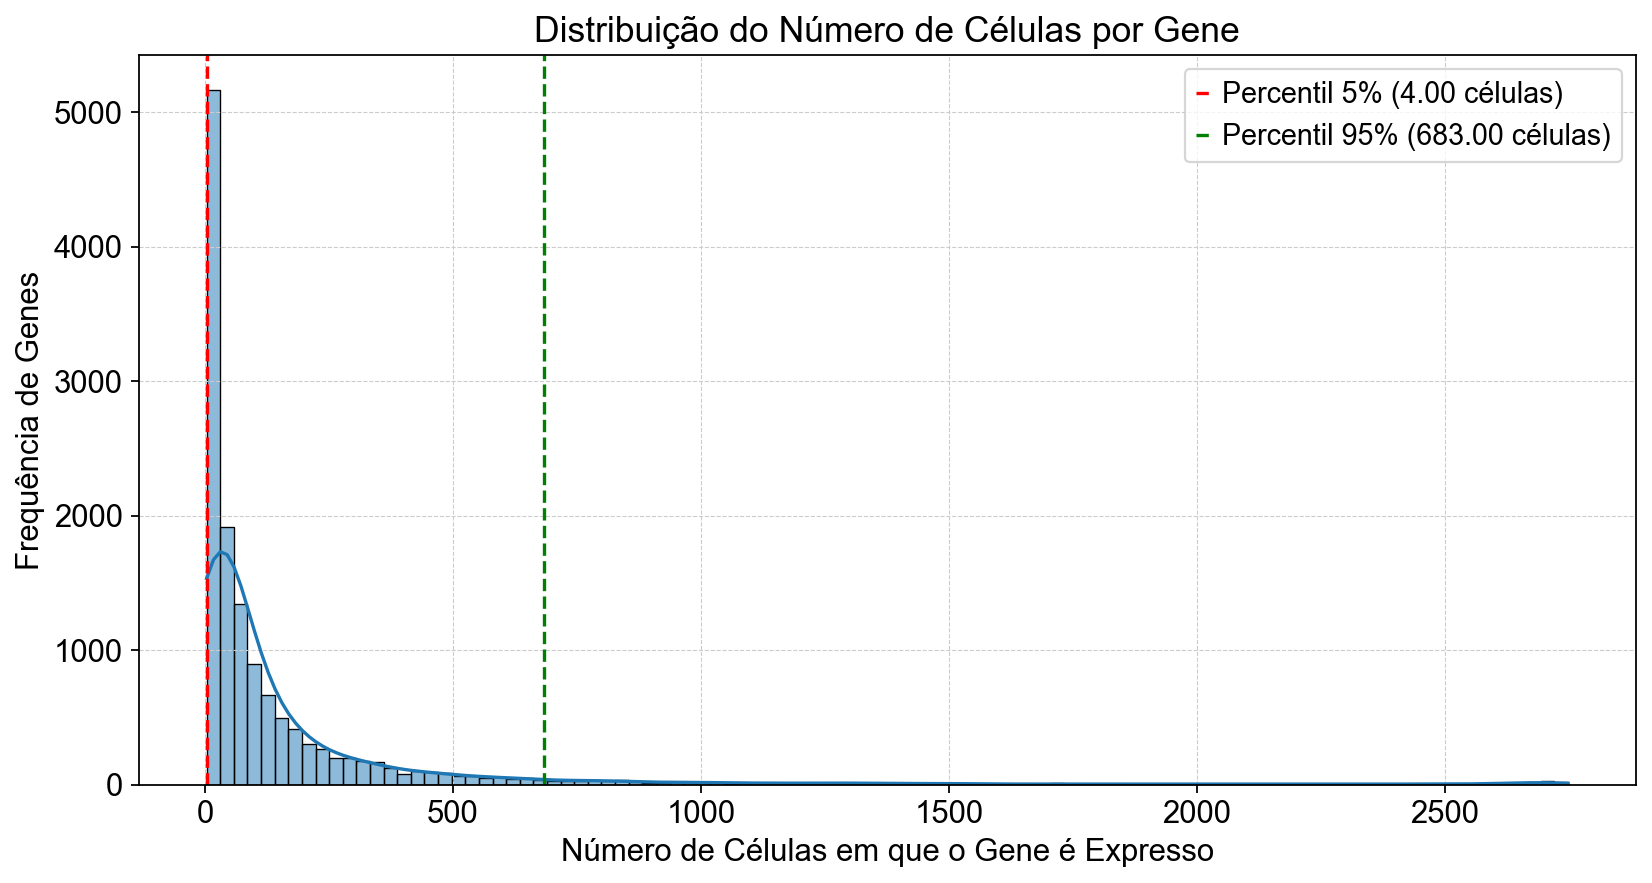

--- Sugestão para Filtragem de Genes ---

Com base na distribuição, sugerimos manter os genes que são expressos em pelo menos 4.00 células.
Isso corresponde ao percentil 5 da distribuição, ajudando a remover genes com expressão muito esparsa (possivelmente ruído).

Para aplicar este filtro, você pode usar a seguinte função do Scanpy:
sc.pp.filter_genes(adata, min_cells=4)


In [17]:
min_celulas_sugerido, max_celulas_sugerido = sugerir_faixa_de_filtragem_de_genes(adata)

# Divisão do adata removendo células

In [62]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')

In [63]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)


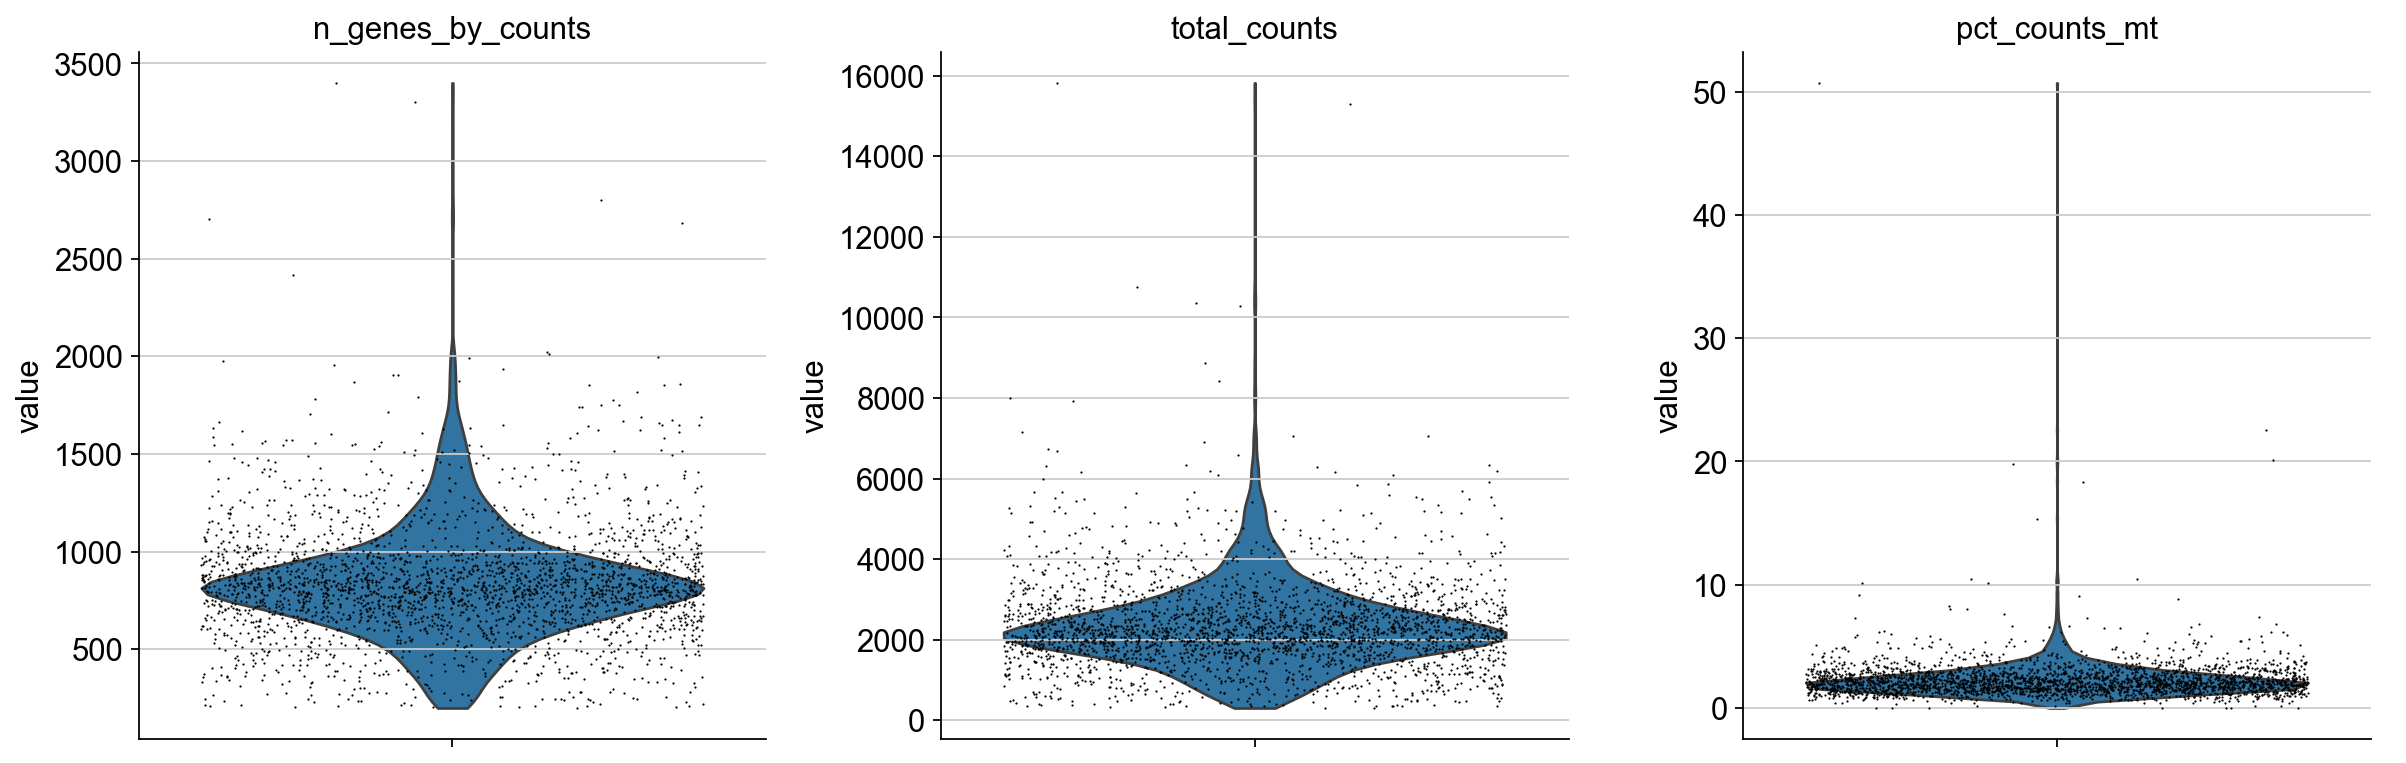

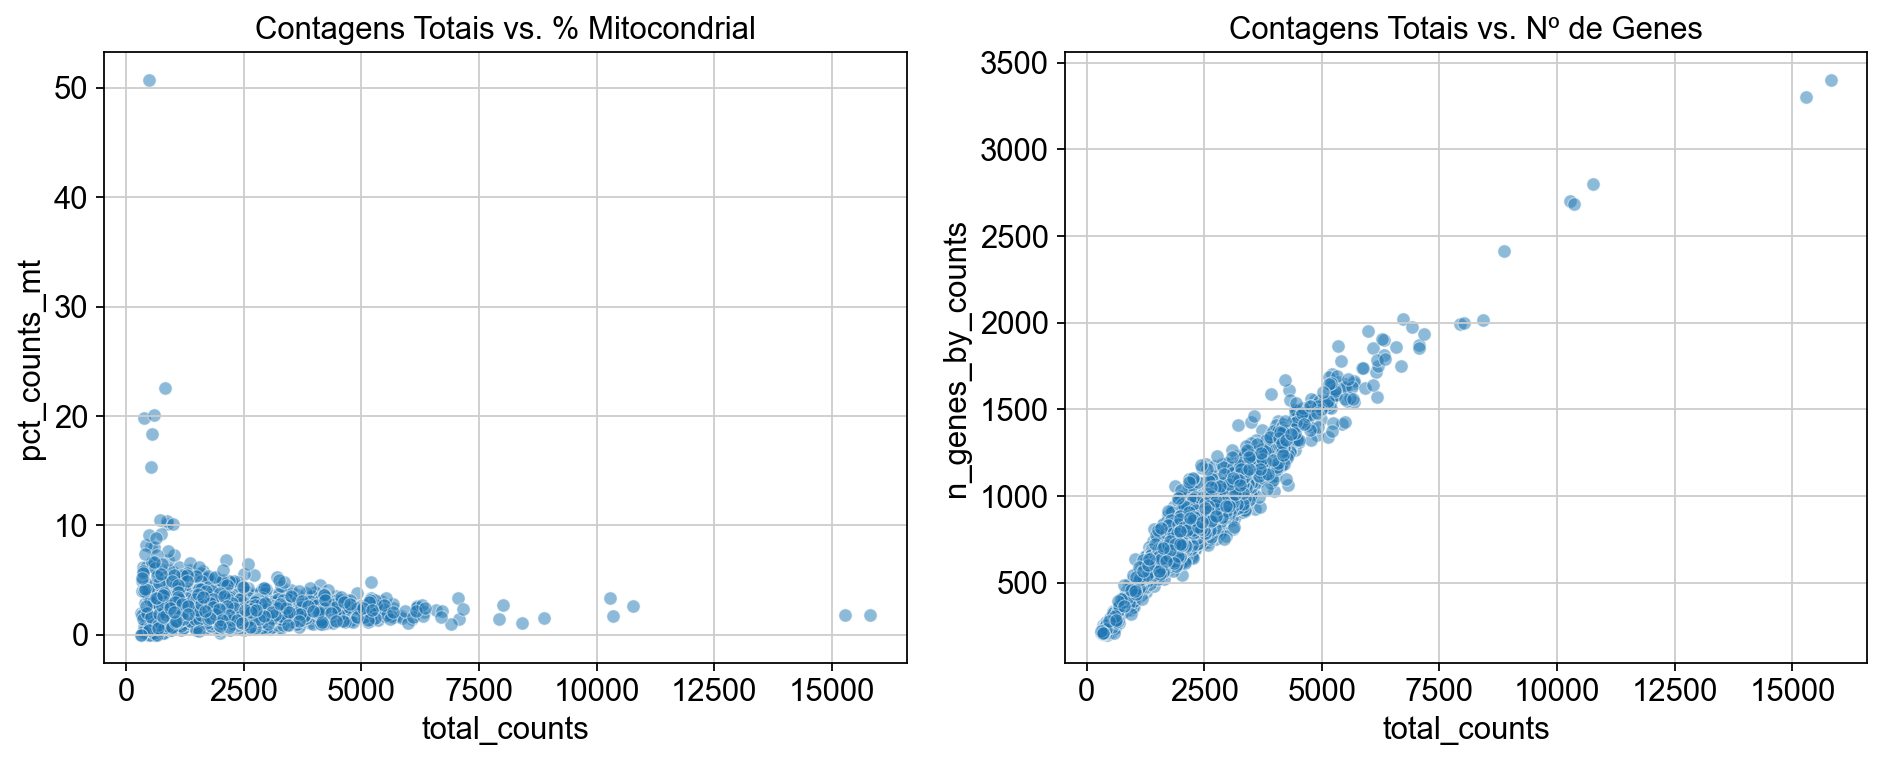

In [64]:


# Gráfico de violino para ver as distribuições
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, show=False)
plt.tight_layout()
plt.show()


# Gráfico de dispersão para ver a relação entre as métricas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=adata.obs, x='total_counts', y='pct_counts_mt', ax=axes[0], alpha=0.5)
axes[0].set_title('Contagens Totais vs. % Mitocondrial')

sns.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts', ax=axes[1], alpha=0.5)
axes[1].set_title('Contagens Totais vs. Nº de Genes')

plt.tight_layout()
plt.show()

normalizing counts per cell
    finished (0:00:00)


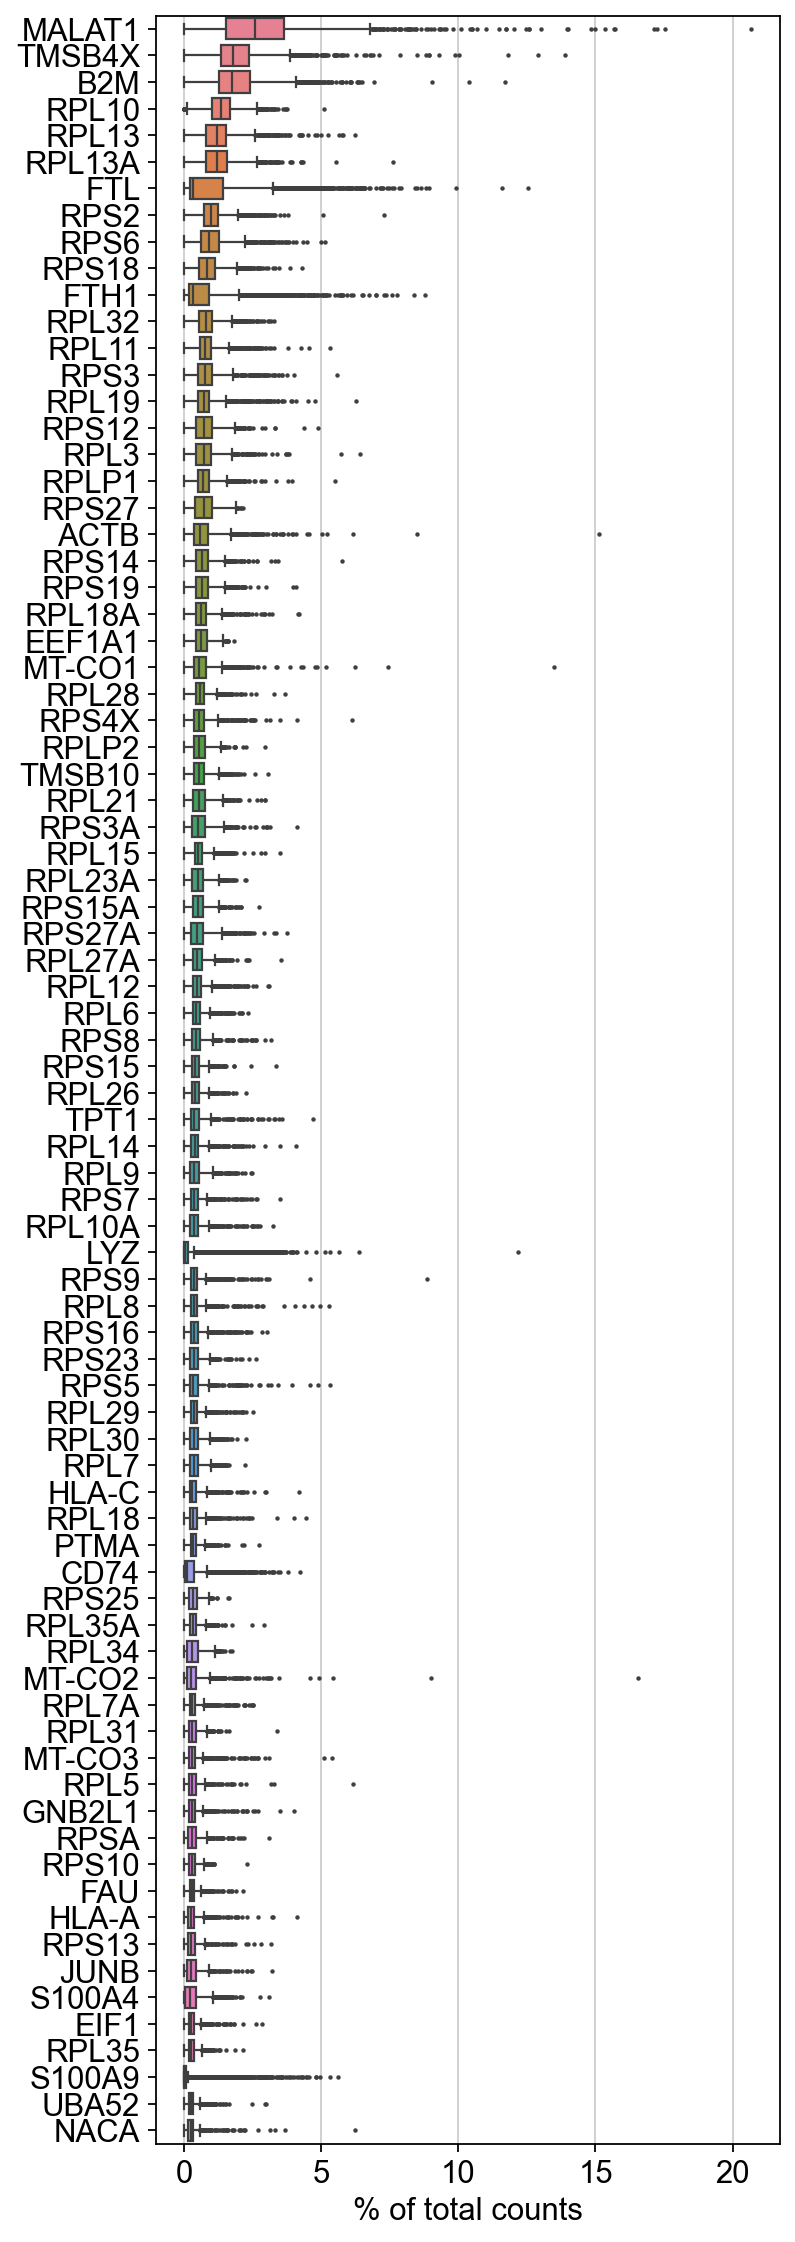

In [65]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pl.highest_expr_genes(adata, n_top=80)

In [66]:
# --- Defina seu limiar aqui ---
limiar_mt = 9 # Exemplo: remover células com mais de 10% de contagens mitocondriais

# Mostra o número de células antes de filtrar
print(f"Número de células ANTES da filtragem: {adata.n_obs}")

# Filtra o objeto adata para manter apenas as células que passam no critério
adata = adata[adata.obs['pct_counts_mt'] < limiar_mt, :]

# Mostra o número de células depois de filtrar
print(f"Número de células DEPOIS da filtragem: {adata.n_obs}")

Número de células ANTES da filtragem: 2751
Número de células DEPOIS da filtragem: 2739


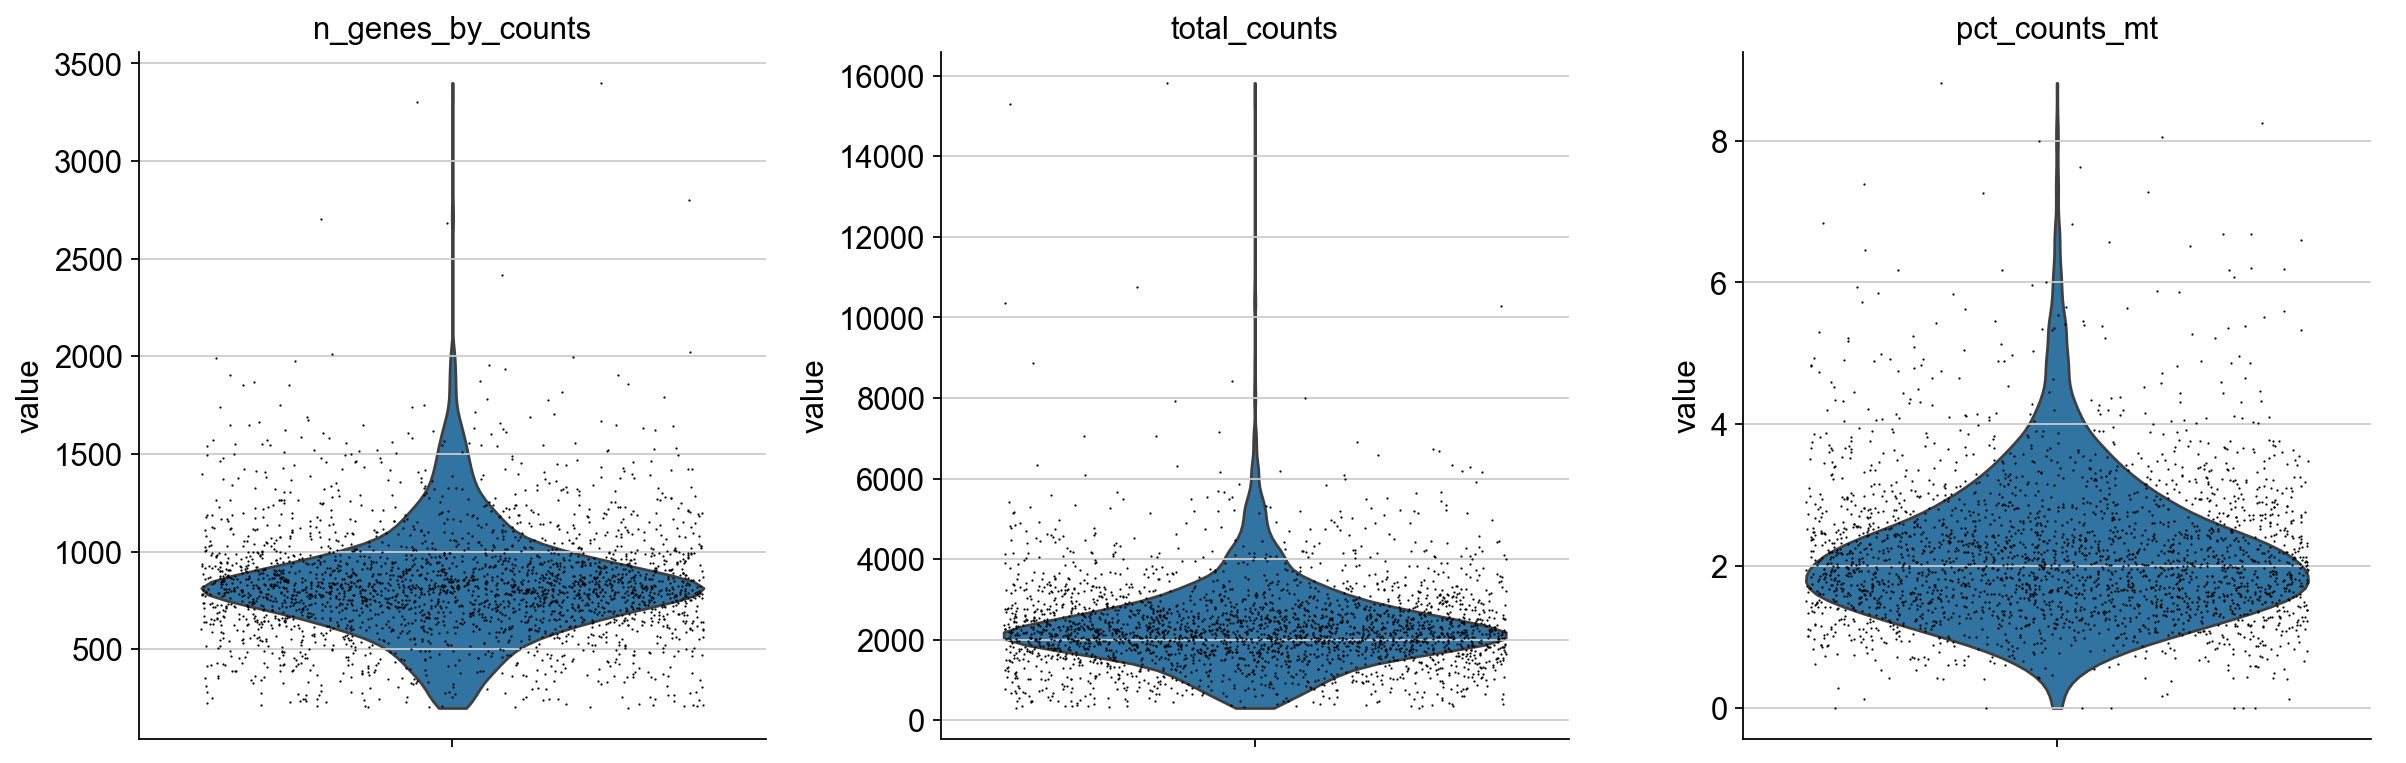

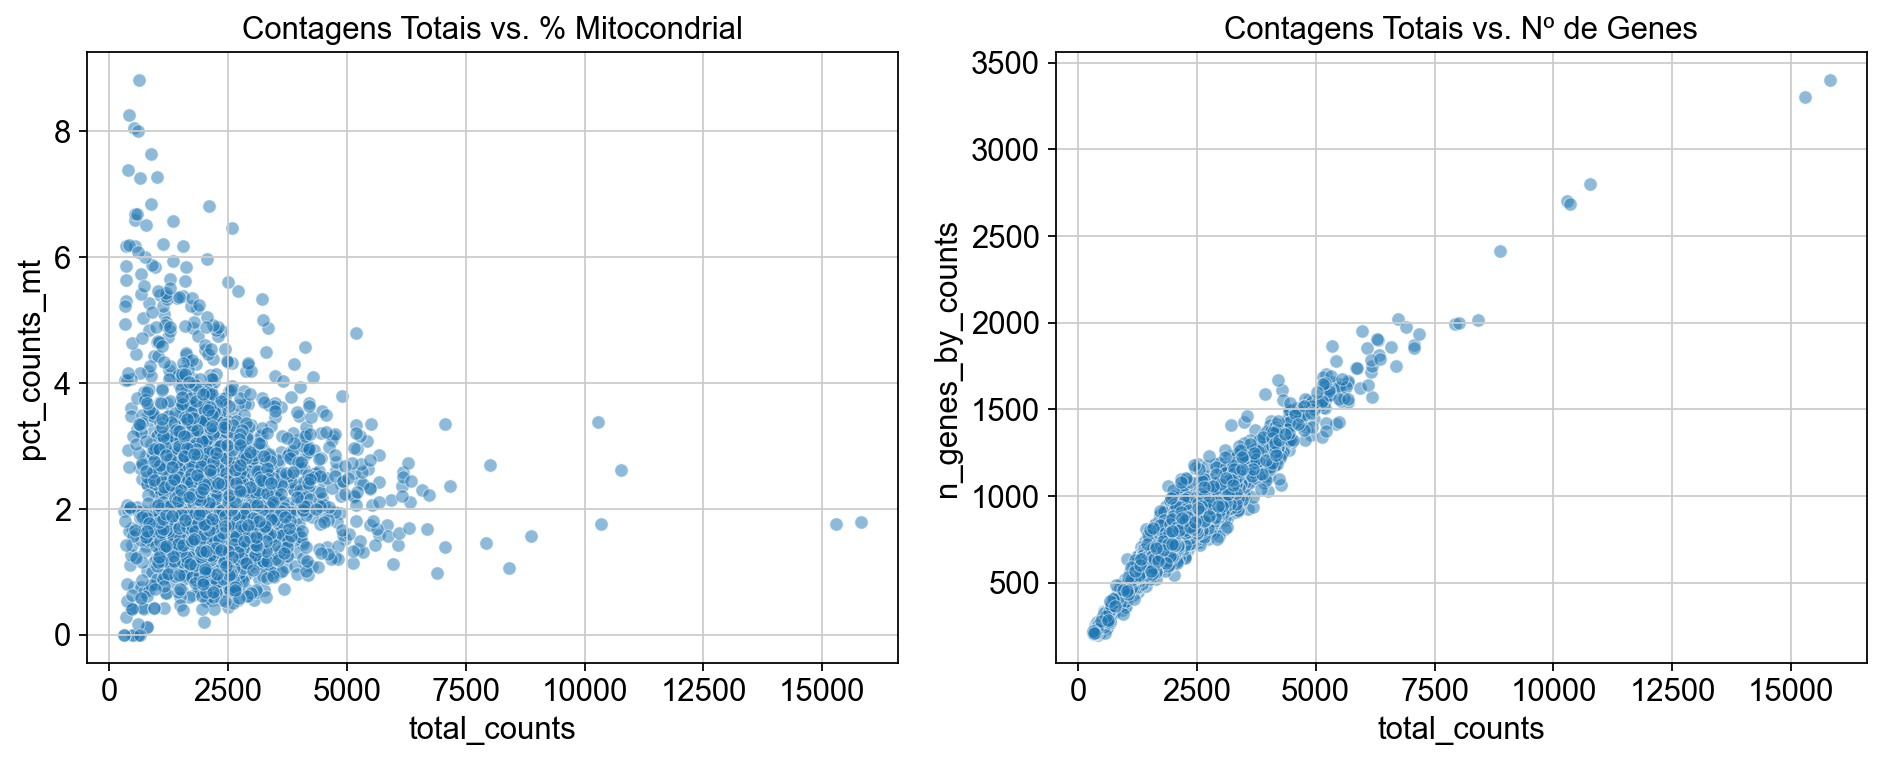

In [67]:


# Gráfico de violino para ver as distribuições
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, show=False)
plt.tight_layout()
plt.show()


# Gráfico de dispersão para ver a relação entre as métricas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=adata.obs, x='total_counts', y='pct_counts_mt', ax=axes[0], alpha=0.5)
axes[0].set_title('Contagens Totais vs. % Mitocondrial')

sns.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts', ax=axes[1], alpha=0.5)
axes[1].set_title('Contagens Totais vs. Nº de Genes')

plt.tight_layout()
plt.show()

normalizing counts per cell
    finished (0:00:00)


C:\Users\fuedg\anaconda3\envs\scanpy\Lib\site-packages\scanpy\preprocessing\_qc.py:145: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


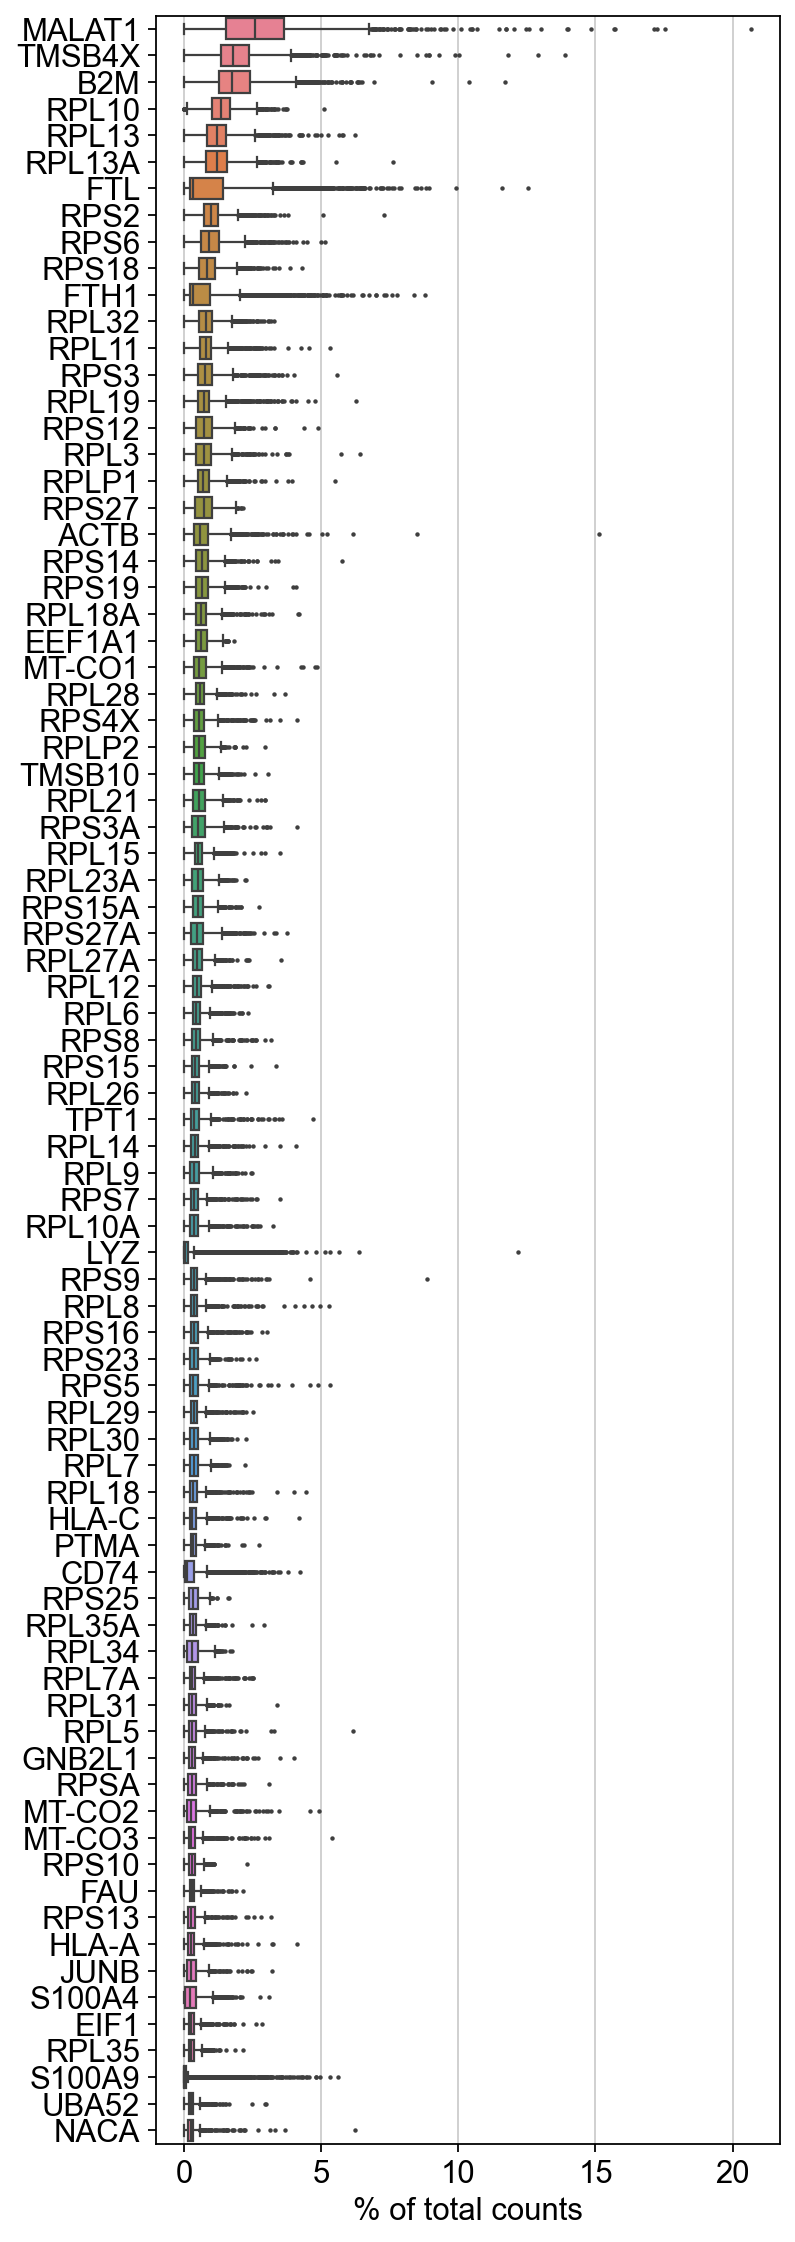

In [68]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
sc.pl.highest_expr_genes(adata, n_top=80)

# Salvar arquivo

In [69]:
adata.write('arquivo.h5ad')